In [15]:
import numpy as np
from scipy import stats
import pymc3 as pm
#import arviz as az
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [34]:
np.random.seed(123)
n_experiments = 1000
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 

In [35]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(draws=10000,tune=500,cores=5)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [theta]
Sampling 5 chains: 100%|██████████| 52500/52500 [00:19<00:00, 2712.72draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f8e599278>,
      dtype=object)

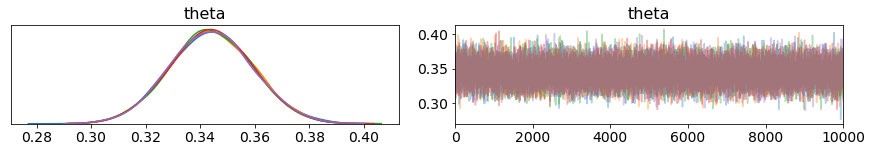

In [36]:
pm.plot_trace(trace)

In [37]:
pm.gelman_rubin(trace)

{'theta': 0.9999757621273873}

In [41]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.344279,0.015031,0.000095,0.314827,0.373684,20769.072852,0.999976


In [39]:
pm.effective_n(trace)

{'theta': 20769.072852460195}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f8e68e208>,
      dtype=object)

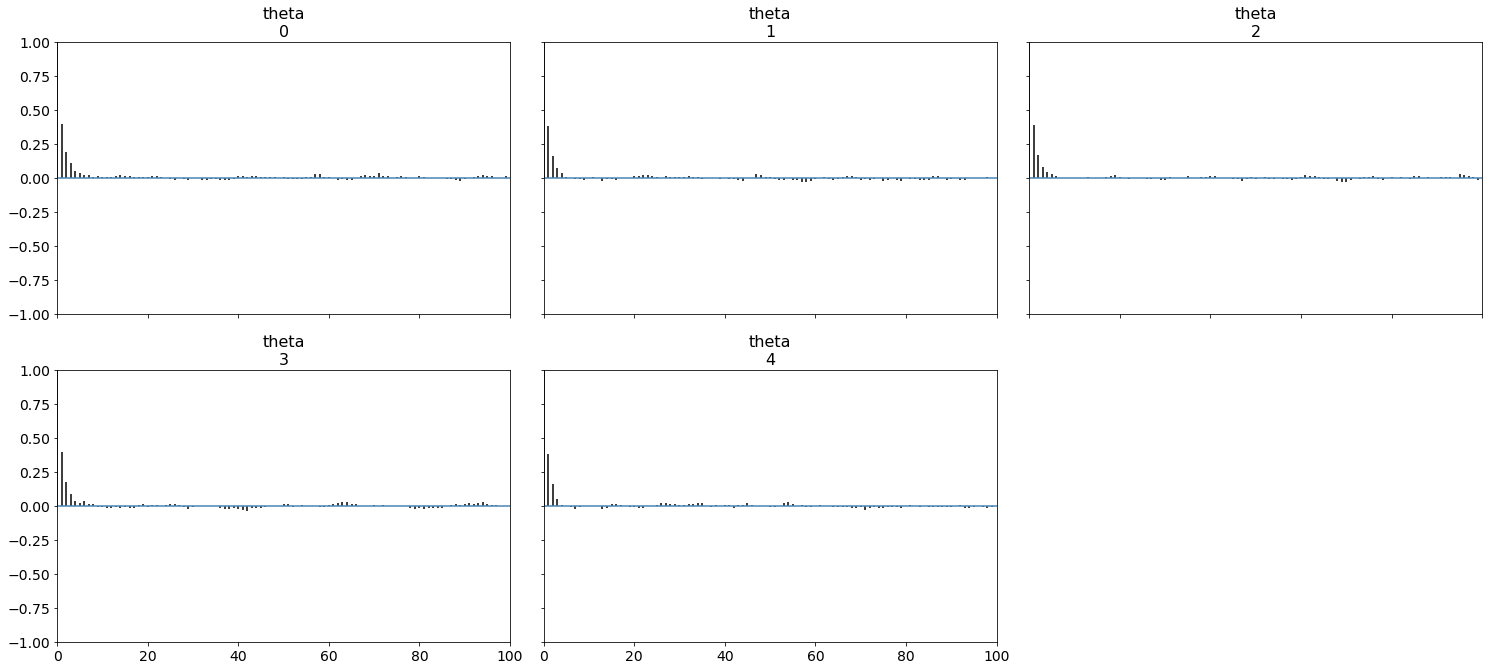

In [40]:
pm.autocorrplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f8e962b38>],
      dtype=object)

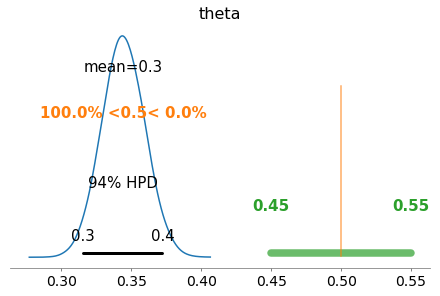

In [44]:
pm.plot_posterior(trace, kde_plot=True,rope=[0.45, .55],ref_val=0.5)

In [9]:
trace

<MultiTrace: 5 chains, 10000 iterations, 2 variables>

In [23]:
help(pm.plot_trace)

Help on function plot_trace in module arviz.plots.traceplot:

plot_trace(data, var_names=None, coords=None, divergences='bottom', figsize=None, textsize=None, lines=None, combined=False, plot_kwargs=None, fill_kwargs=None, rug_kwargs=None, hist_kwargs=None, trace_kwargs=None)
    Plot distribution (histogram or kernel density estimates) and sampled values.
    
    If `divergences` data is available in `sample_stats`, will plot the location of divergences as
    dashed vertical lines.
    
    Parameters
    ----------
    data : obj
        Any object that can be converted to an az.InferenceData object
        Refer to documentation of az.convert_to_dataset for details
    var_names : list of variable names
        Variables to be plotted, two variables are required.
    coords : mapping, optional
        Coordinates of var_names to be plotted. Passed to `Dataset.sel`
    divergences : {"bottom", "top", None, False}
        Plot location of divergences on the traceplots. Options are "